<a href="https://colab.research.google.com/github/LeonHauch/bachelorarbeit/blob/main/Modelle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files


uploaded = files.upload()

Saving Bank Customer Churn Prediction.csv to Bank Customer Churn Prediction.csv


In [2]:
# Import der libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [3]:
# Laden des Datensatzes

churn_data = pd.read_csv('Bank Customer Churn Prediction.csv')


In [136]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


# Define features to scale and to encode
features_to_scale = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
features_to_encode = ['country', 'gender']

# Set up preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), features_to_scale),
        ('encode', OneHotEncoder(drop='first'), features_to_encode)
    ])

# Extract the 'churn' column before preprocessing
y = churn_data['churn']
X = churn_data.drop(columns=['churn'])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'SVM': SVC(random_state=42, probability = True),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train classifiers and evaluate their performance
accuracies = {}

for name, clf in classifiers.items():
    # Train classifier
    clf.fit(X_train, y_train)
    # Predict on test set
    predictions = clf.predict(X_test)
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, predictions)
    accuracies[name] = accuracy

# Print accuracies for each classifier
for name, acc in accuracies.items():
    print(f"{name}: {acc*100:.2f}%")


SVM: 84.85%
Random Forest: 85.50%
KNN: 84.75%
Naive Bayes: 82.35%
Logistic Regression: 80.35%
Gradient Boosting: 85.60%


In [5]:
import pandas as pd
from sklearn.metrics import roc_auc_score, recall_score, f1_score
# Dictionary to store the metrics
metrics = {
    'Classifier': [],
    'Accuracy': [],
    'AUC-ROC': [],
    'Recall': [],
    'F1 Score': []
}

for name, clf in classifiers.items():

    # Predict on test set
    test_predictions = clf.predict(X_test)
    test_probabilities = clf.predict_proba(X_test)[:, 1]  # probabilities for the positive class

    # Compute metrics
    accuracy = accuracy_score(y_test, test_predictions)
    auc_roc = roc_auc_score(y_test, test_probabilities)
    recall = recall_score(y_test, test_predictions)
    f1 = f1_score(y_test, test_predictions)

    # Store metrics
    metrics['Classifier'].append(name)
    metrics['Accuracy'].append(accuracy)
    metrics['AUC-ROC'].append(auc_roc)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

# Convert the metrics dictionary to a pandas DataFrame for a nice table display
df_metrics = pd.DataFrame(metrics)

# Display the metrics table
df_metrics


,Classifier,Accuracy,AUC-ROC,Recall,F1 Score
0,SVM,0.8485,0.804476,0.381679,0.497512
1,Random Forest,0.8550,0.845913,0.455471,0.552469
2,KNN,0.8475,0.793356,0.465649,0.545455
3,Naive Bayes,0.8235,0.785104,0.335878,0.427877
4,Logistic Regression,0.8035,0.763636,0.139949,0.218688
5,Gradient Boosting,0.8560,0.855385,0.445293,0.548589


In [6]:
# Hyperparametertuning
from sklearn.model_selection import GridSearchCV
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1]
    }
}

# Dictionary to store best estimators after hyperparameter tuning
best_estimators = {}

# Perform hyperparameter tuning for each classifier
for name, clf in classifiers.items():
    if name in param_grids:
        grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Save the best estimator
        best_estimators[name] = grid_search.best_estimator_

        # Print results
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best cross-validation score for {name}: {grid_search.best_score_:.2f}")
        print("-"*50)

# You can then evaluate these optimized models on the test set using the best_estimators dictionary.


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best cross-validation score for SVM: 0.85
--------------------------------------------------
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Best cross-validation score for Random Forest: 0.85
--------------------------------------------------
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for KNN: {'n_neighbors': 7}
Best cross-validation score for KNN: 0.84
--------------------------------------------------
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 50}
Best cross-validation score for Gradient Boosting: 0.85
--------------------------------------------------


In [7]:
# Dictionary to store the metrics for all classifiers
all_metrics = {
    'Classifier': [],
    'Accuracy': [],
    'AUC-ROC': [],
    'Recall': [],
    'F1 Score': []
}

# Combine both dictionaries: use tuned classifiers when available, else use the original classifiers
combined_classifiers = {name: best_estimators.get(name, clf) for name, clf in classifiers.items()}

for name, clf in combined_classifiers.items():

    # Predict on test set
    test_predictions = clf.predict(X_test)
    test_probabilities = clf.predict_proba(X_test)[:, 1]  # probabilities for the positive class

    # Compute metrics
    accuracy = accuracy_score(y_test, test_predictions)
    auc_roc = roc_auc_score(y_test, test_probabilities)
    recall = recall_score(y_test, test_predictions)
    f1 = f1_score(y_test, test_predictions)

    # Store metrics
    all_metrics['Classifier'].append(name)
    all_metrics['Accuracy'].append(accuracy)
    all_metrics['AUC-ROC'].append(auc_roc)
    all_metrics['Recall'].append(recall)
    all_metrics['F1 Score'].append(f1)

# Convert the metrics dictionary to a pandas DataFrame for a nice table display
df_all_metrics = pd.DataFrame(all_metrics)

# Display the metrics table
df_all_metrics


,Classifier,Accuracy,AUC-ROC,Recall,F1 Score
0,SVM,0.8515,0.801655,0.422392,0.527822
1,Random Forest,0.8600,0.858529,0.427481,0.545455
2,KNN,0.8500,0.802978,0.458015,0.545455
3,Naive Bayes,0.8235,0.785104,0.335878,0.427877
4,Logistic Regression,0.8035,0.763636,0.139949,0.218688
5,Gradient Boosting,0.8525,0.854475,0.417303,0.526485


In [ ]:
!pip install lime shap

In [9]:
#Random Sampling

# Sample 10 random instances from the test set
random_indices = np.random.choice(np.arange(X_test.shape[0]), size=10, replace=False)
X_sample = X_test[random_indices]

y_sample = y_test.iloc[random_indices].values



In [132]:
# Select a single instance from the sampled data
instance = X_sample[3]
true_label = y_sample[3]

In [133]:
# SHAP Force Plot (using all features)
shap.initjs()  # Initialize JavaScript visualization
shap.force_plot(explainer_shap_svm.expected_value[1], shap_value_svm_single, instance, feature_names=feature_names[:len(shap_value_svm_single)])


In [137]:
explainer_shap_gb = shap.TreeExplainer(classifiers['Gradient Boosting'])
shap_values_gb = explainer_shap_gb.shap_values(X_sample)


In [138]:
# Find the index of the first instance with a negative SHAP value
negative_shap_idx = np.where(shap_values_gb < 0)[0][0]
negative_instance = X_sample[negative_shap_idx]


In [139]:
shap.initjs()
shap.force_plot(explainer_shap_gb.expected_value, shap_values_gb[negative_shap_idx], negative_instance)


In [135]:
print(classifiers)


['Naive Bayes', 'KNN', 'SVM', 'Random Forest', 'Gradient Boosting']


In [80]:
# SHAP Initialization for SVM
background_data_svm = X_train[np.random.choice(X_train.shape[0], 20, replace=False)]
explainer_shap_svm = shap.KernelExplainer(combined_classifiers['SVM'].predict_proba, background_data_svm)

# Compute SHAP values for the selected instance using SVM
shap_value_svm_single = explainer_shap_svm.shap_values(instance)[1]  # positive class

# LIME Initialization for SVM
explainer_lime_svm = LimeTabularExplainer(X_train,
                                          feature_names=feature_names,
                                          class_names=['No Churn', 'Churn'],
                                          mode='classification')

# Compute LIME explanation for the selected instance using SVM
exp_svm_single = explainer_lime_svm.explain_instance(instance, combined_classifiers['SVM'].predict_proba, num_features=len(feature_names))
lime_value_svm_single = [value[1] for value in exp_svm_single.as_list()]

# Display the SHAP and LIME values
print("SHAP values for the selected instance using SVM:")
print(shap_value_svm_single)
print("\nLIME values for the selected instance using SVM:")
print(lime_value_svm_single)

# Count the number of LIME features with "Betrag" >= 0.01
lime_features_above_threshold = sum(1 for value in lime_value_svm_single if abs(value) >= 0.01)
print(f"Number of LIME features with Betrag >= 0.01: {lime_features_above_threshold}")


SHAP values for the selected instance using SVM:
[ 0.0098686  -0.13396444 -0.00783992  0.03322554  0.02879591  0.02840453
  0.01064635 -0.00167758 -0.00689398]

LIME values for the selected instance using SVM:
[-0.08671806575794738, -0.03885859483082618, -0.028621272465267595, -0.019728811915761157, 0.01862111552541798, 0.008082216405933311, -0.0024437510244295674, 0.00035651479243695687, -0.0002042532991871723]
Number of LIME features with Betrag >= 0.01: 5


In [ ]:
# Random Forest Classifier
import shap
# SHAP Initialization for Random Forest using TreeSHAP
explainer_shap_rf = shap.TreeExplainer(classifiers['Random Forest'])

# Loop through the first 5 instances from X_sample and y_sample
for idx in range(5):
    instance = X_sample[idx]
    true_label = y_sample[idx]

    # Compute SHAP values for the selected instance using Random Forest
    shap_value_rf_single = explainer_shap_rf.shap_values(instance)[1]  # positive class

    # LIME Initialization for Random Forest
    explainer_lime_rf = LimeTabularExplainer(X_train,
                                             feature_names=feature_names,
                                             class_names=['No Churn', 'Churn'],
                                             mode='classification')

    # Compute LIME explanation for the selected instance using Random Forest
    exp_rf_single = explainer_lime_rf.explain_instance(instance, classifiers['Random Forest'].predict_proba, num_features=len(feature_names))
    lime_value_rf_single = [value[1] for value in exp_rf_single.as_list()]

    # Display the SHAP and LIME values for the current instance
    print(f"Instance {idx + 1}:")
    print("SHAP values:")
    print(shap_value_rf_single)
    print("\nLIME values:")
    print(lime_value_rf_single)

    # Count the number of LIME features with "Betrag" >= 0.01
    lime_features_above_threshold_rf = sum(1 for value in lime_value_rf_single if abs(value) >= 0.01)
    print(f"Number of LIME features with Betrag >= 0.01 for Random Forest: {lime_features_above_threshold_rf}")

    # SHAP Force Plot (using all features)
    shap.initjs()  # Initialize JavaScript visualization
    shap.force_plot(explainer_shap_rf.expected_value[1], shap_value_rf_single, instance, feature_names=feature_names[:len(shap_value_rf_single)])
    print("\n---\n")


In [74]:
# SHAP Initialization for Random Forest using TreeSHAP
explainer_shap_rf = shap.TreeExplainer(classifiers['Random Forest'])

# Select the first instance
instance = X_sample[4]

# Compute SHAP values for the selected instance using Random Forest
shap_value_rf_single = explainer_shap_rf.shap_values(instance)[1]  # positive class

# SHAP Force Plot (using all features)
shap.initjs()  # Initialize JavaScript visualization
shap.force_plot(explainer_shap_rf.expected_value[1], shap_value_rf_single, instance, feature_names=feature_names[:len(shap_value_rf_single)])


In [ ]:
# SHAP Initialization for KNN using KernelExplainer
background_data_knn = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]  # Using 100 background samples
explainer_shap_knn = shap.KernelExplainer(classifiers['KNN'].predict_proba, background_data_knn)

# Loop through the first 5 instances from X_sample and y_sample
for idx in range(5):
    instance = X_sample[idx]
    true_label = y_sample[idx]

    # Compute SHAP values for the selected instance using KNN
    shap_value_knn_single = explainer_shap_knn.shap_values(instance)[1]  # positive class

    # LIME Initialization for KNN
    explainer_lime_knn = LimeTabularExplainer(X_train,
                                              feature_names=feature_names,
                                              class_names=['No Churn', 'Churn'],
                                              mode='classification')

    # Compute LIME explanation for the selected instance using KNN
    exp_knn_single = explainer_lime_knn.explain_instance(instance, classifiers['KNN'].predict_proba, num_features=len(feature_names))
    lime_value_knn_single = [value[1] for value in exp_knn_single.as_list()]

    # Display the SHAP and LIME values for the current instance
    print(f"Instance {idx + 1}:")
    print("SHAP values:")
    print(shap_value_knn_single)
    print("\nLIME values:")
    print(lime_value_knn_single)

    # Count the number of LIME features with "Betrag" >= 0.01
    lime_features_above_threshold_knn = sum(1 for value in lime_value_knn_single if abs(value) >= 0.01)
    print(f"Number of LIME features with Betrag >= 0.01 for KNN: {lime_features_above_threshold_knn}")



In [ ]:
# SHAP Initialization for KNN using KernelExplainer
explainer_shap_knn = shap.KernelExplainer(classifiers['KNN'].predict_proba, background_data_knn)

# Select the fifth instance
instance = X_sample[0]

# Compute SHAP values for the selected instance using KNN
shap_value_knn_single = explainer_shap_knn.shap_values(instance)[1]  # positive class

# SHAP Force Plot (using all features)
shap.initjs()  # Initialize JavaScript visualization
shap.force_plot(explainer_shap_knn.expected_value[1], shap_value_knn_single, instance, feature_names=feature_names[:len(shap_value_knn_single)])


In [ ]:
# SHAP Initialization for Naive Bayes using KernelExplainer
background_data_nb = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]  # Using 100 background samples
explainer_shap_nb = shap.KernelExplainer(classifiers['Naive Bayes'].predict_proba, background_data_nb)

# Loop through the first 5 instances from X_sample and y_sample
for idx in range(5):
    instance = X_sample[idx]
    true_label = y_sample[idx]

    # Compute SHAP values for the selected instance using Naive Bayes
    shap_value_nb_single = explainer_shap_nb.shap_values(instance)[1]  # positive class

    # LIME Initialization for Naive Bayes
    explainer_lime_nb = LimeTabularExplainer(X_train,
                                             feature_names=feature_names,
                                             class_names=['No Churn', 'Churn'],
                                             mode='classification')

    # Compute LIME explanation for the selected instance using Naive Bayes
    exp_nb_single = explainer_lime_nb.explain_instance(instance, classifiers['Naive Bayes'].predict_proba, num_features=len(feature_names))
    lime_value_nb_single = [value[1] for value in exp_nb_single.as_list()]

    # Display the SHAP and LIME values for the current instance
    print(f"Instance {idx + 1}:")
    print("SHAP values:")
    print(shap_value_nb_single)
    print("\nLIME values:")
    print(lime_value_nb_single)

    # Count the number of LIME features with "Betrag" >= 0.01
    lime_features_above_threshold_nb = sum(1 for value in lime_value_nb_single if abs(value) >= 0.01)
    print(f"Number of LIME features with Betrag >= 0.01 for Naive Bayes: {lime_features_above_threshold_nb}")


In [131]:
# SHAP Initialization for Naive Bayes using KernelExplainer
explainer_shap_nb = shap.KernelExplainer(classifiers['Naive Bayes'].predict_proba, background_data_nb)

# Select the fifth instance
instance = X_sample[0]

# Compute SHAP values for the selected instance using Naive Bayes
shap_value_nb_single = explainer_shap_nb.shap_values(instance)[1]  # positive class

# SHAP Force Plot (using all features)
shap.initjs()  # Initialize JavaScript visualization
shap.force_plot(explainer_shap_nb.expected_value[1], shap_value_nb_single, instance, feature_names=feature_names[:len(shap_value_nb_single)])


TypeError: ignored

In [130]:
# SHAP Initialization for Gradient Boosting using TreeSHAP
explainer_shap_gb = shap.TreeExplainer(classifiers['Gradient Boosting'])

# Loop through the first 5 instances from X_sample and y_sample
for idx in range(5):
    instance = X_sample[idx]
    true_label = y_sample[idx]

    # Compute SHAP values for the selected instance using Gradient Boosting
    shap_value_gb_single = explainer_shap_gb.shap_values(instance)[1]  # positive class

    # LIME Initialization for Gradient Boosting
    explainer_lime_gb = LimeTabularExplainer(X_train,
                                             feature_names=feature_names,
                                             class_names=['No Churn', 'Churn'],
                                             mode='classification')

    # Compute LIME explanation for the selected instance using Gradient Boosting
    exp_gb_single = explainer_lime_gb.explain_instance(instance, classifiers['Gradient Boosting'].predict_proba, num_features=len(feature_names))
    lime_value_gb_single = [value[1] for value in exp_gb_single.as_list()]

    # Display the SHAP and LIME values for the current instance
    print(f"Instance {idx + 1}:")
    print("SHAP values:")
    print(shap_value_gb_single)
    print("\nLIME values:")
    print(lime_value_gb_single)

    # Count the number of LIME features with "Betrag" >= 0.01
    lime_features_above_threshold_gb = sum(1 for value in lime_value_gb_single if abs(value) >= 0.01)
    print(f"Number of LIME features with Betrag >= 0.01 for Gradient Boosting: {lime_features_above_threshold_gb}")




TypeError: ignored

In [129]:
# SHAP Initialization for Gradient Boosting using TreeSHAP
explainer_shap_gb = shap.TreeExplainer(classifiers['Gradient Boosting'])

# Select the fifth instance
instance = X_sample[0]

# Compute SHAP values for the selected instance using Gradient Boosting
shap_value_gb_single = explainer_shap_gb.shap_values(instance)  # Only one array for binary classification

# SHAP Force Plot (using all features)
shap.initjs()  # Initialize JavaScript visualization
shap.force_plot(explainer_shap_gb.expected_value, shap_value_gb_single, instance)





TypeError: ignored

In [115]:
print("Shape of instance:", instance.shape)
print("Shape of shap_value_gb_single:", shap_value_gb_single.shape)


Shape of instance: (9,)
Shape of shap_value_gb_single: (9,)


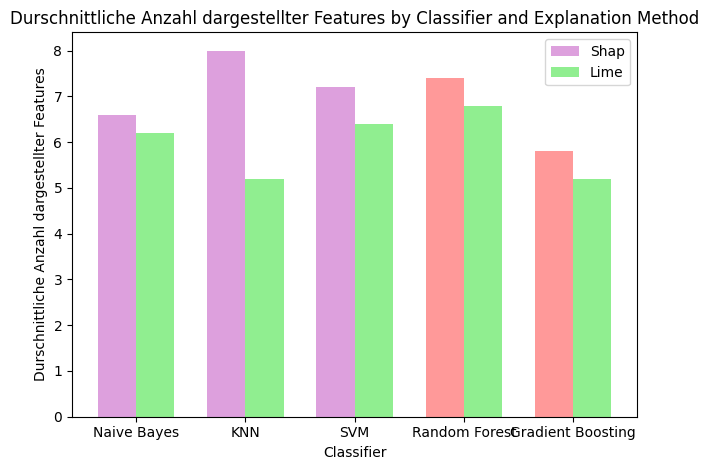

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Data
classifiers = ['Naive Bayes', 'KNN', 'SVM', 'Random Forest', 'Gradient Boosting']
shap_values = [6.6, 8, 7.2, 7.4, 5.8]
lime_values = [6.2, 5.2, 6.4, 6.8, 5.2]

# Colors
lime_color = "#90ee90"  # light green
shap_colors_tree = "#ff9999"  # light red
shap_colors_kernel = "#dda0dd"  # light violet

# Deciding colors based on classifier type
shap_colors = [shap_colors_kernel, shap_colors_kernel, shap_colors_kernel, shap_colors_tree, shap_colors_tree]

# Bar width
bar_width = 0.35
index = np.arange(len(classifiers))

# Create bars
fig, ax = plt.subplots()
bar1 = ax.bar(index, shap_values, bar_width, label='Shap', color=shap_colors)
bar2 = ax.bar(index + bar_width, lime_values, bar_width, label='Lime', color=lime_color)

# Descriptions
ax.set_xlabel('Classifier')
ax.set_ylabel('Durschnittliche Anzahl dargestellter Features')
ax.set_title('Durschnittliche Anzahl dargestellter Features ')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classifiers)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


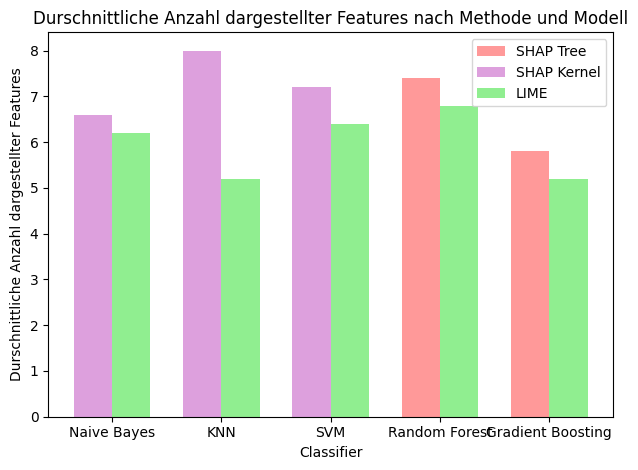

In [127]:
import matplotlib.pyplot as plt
import numpy as np

# Data
classifiers = ['Naive Bayes', 'KNN', 'SVM', 'Random Forest', 'Gradient Boosting']
shap_values = [6.6, 8, 7.2, 7.4, 5.8]
lime_values = [6.2, 5.2, 6.4, 6.8, 5.2]

# Colors
lime_color = "#90ee90"  # light green
shap_colors_tree = "#ff9999"  # light red
shap_colors_kernel = "#dda0dd"  # light violet

# Deciding colors based on classifier type
shap_colors = [shap_colors_kernel, shap_colors_kernel, shap_colors_kernel, shap_colors_tree, shap_colors_tree]

# Bar width
bar_width = 0.35
index = np.arange(len(classifiers))

# Create bars
fig, ax = plt.subplots()

# Two SHAP bars for legend differentiation
bar_shap_tree = ax.bar(index, shap_values, bar_width, label='SHAP Tree', color=shap_colors_tree)  # Invisible bar just for legend
bar_shap_kernel = ax.bar(index, shap_values, bar_width, label='SHAP Kernel', color=shap_colors_kernel)  # Invisible bar just for legend

# Actual SHAP and LIME bars
bar1 = ax.bar(index, shap_values, bar_width, color=shap_colors)
bar2 = ax.bar(index + bar_width, lime_values, bar_width, label='LIME', color=lime_color)

# Descriptions
ax.set_xlabel('Classifier')
ax.set_ylabel('Durschnittliche Anzahl dargestellter Features')
ax.set_title('Durschnittliche Anzahl dargestellter Features nach Methode und Modell')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classifiers)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [140]:
# Select a random instance
random_idx = np.random.choice(X_sample.shape[0])
instance = X_sample[random_idx]



In [143]:
noise_levels = np.linspace(0, 1, 10)  # Ten noise levels from 0 to 1
perturbed_instances = [instance + np.random.normal(0, noise, instance.shape) for noise in noise_levels]


In [144]:
# Select 20 random samples from X_train as the background dataset
background_data_svm = X_train[np.random.choice(X_train.shape[0], 20, replace=False)]

# Initialize SHAP explainer with the background data
explainer_shap_svm = shap.KernelExplainer(classifiers['SVM'].predict_proba, background_data_svm)

# Initialize LIME explainer
explainer_lime_svm = LimeTabularExplainer(X_train,
                                          feature_names=feature_names,
                                          class_names=['No Churn', 'Churn'],
                                          mode='classification')

# Compute SHAP and LIME explanations
shap_explanations = [explainer_shap_svm.shap_values(inst)[1] for inst in perturbed_instances]
lime_explanations = [explainer_lime_svm.explain_instance(inst, classifiers['SVM'].predict_proba, num_features=len(feature_names)).as_list() for inst in perturbed_instances]


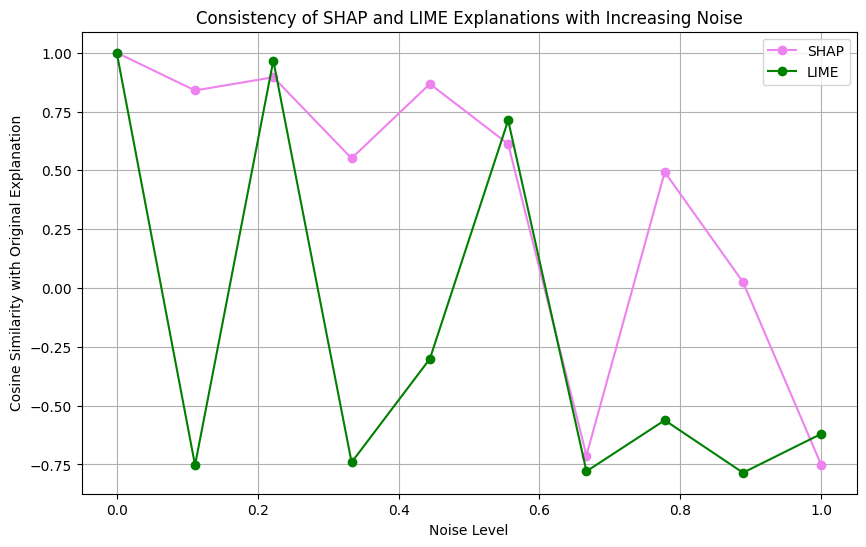

In [145]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarities
original_shap = shap_explanations[0]
original_lime = np.array([val[1] for val in lime_explanations[0]])

shap_similarities = [cosine_similarity([original_shap], [shap_exp])[0][0] for shap_exp in shap_explanations]
lime_similarities = [cosine_similarity([original_lime], [np.array([val[1] for val in lime_exp])])[0][0] for lime_exp in lime_explanations]

# Plot
plt.figure(figsize=(10,6))
plt.plot(noise_levels, shap_similarities, '-o', label='SHAP', color='violet')
plt.plot(noise_levels, lime_similarities, '-o', label='LIME', color='green')
plt.title('Consistency of SHAP and LIME Explanations with Increasing Noise')
plt.xlabel('Noise Level')
plt.ylabel('Cosine Similarity with Original Explanation')
plt.legend()
plt.grid(True)
plt.show()


In [146]:
# Select a random instance
random_idx = np.random.choice(X_sample.shape[0])
instance = X_sample[random_idx]


In [147]:
noise_levels = np.linspace(0, 1, 10)  # Ten noise levels from 0 to 1
perturbed_instances = [instance + np.random.normal(0, noise, instance.shape) for noise in noise_levels]


In [148]:
# Select 20 random samples from X_train as the background dataset for SHAP
background_data_rf = X_train[np.random.choice(X_train.shape[0], 20, replace=False)]

# Initialize SHAP explainer for Random Forest
explainer_shap_rf = shap.TreeExplainer(classifiers['Random Forest'], background_data_rf)

# Initialize LIME explainer
explainer_lime_rf = LimeTabularExplainer(X_train,
                                         feature_names=feature_names,
                                         class_names=['No Churn', 'Churn'],
                                         mode='classification')

# Compute SHAP and LIME explanations
shap_explanations_rf = [explainer_shap_rf.shap_values(inst)[1] for inst in perturbed_instances]
lime_explanations_rf = [explainer_lime_rf.explain_instance(inst, classifiers['Random Forest'].predict_proba, num_features=len(feature_names)).as_list() for inst in perturbed_instances]


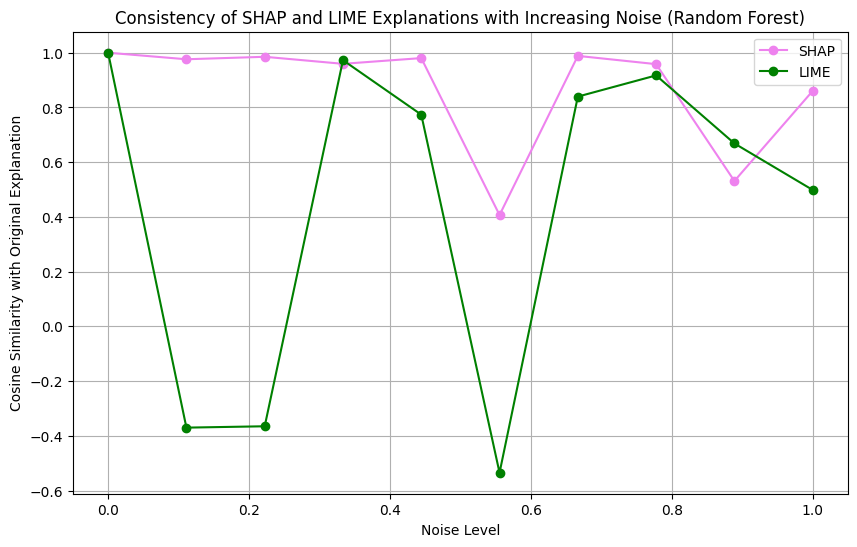

In [149]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarities
original_shap_rf = shap_explanations_rf[0]
original_lime_rf = np.array([val[1] for val in lime_explanations_rf[0]])

shap_similarities_rf = [cosine_similarity([original_shap_rf], [shap_exp])[0][0] for shap_exp in shap_explanations_rf]
lime_similarities_rf = [cosine_similarity([original_lime_rf], [np.array([val[1] for val in lime_exp])])[0][0] for lime_exp in lime_explanations_rf]

# Plot
plt.figure(figsize=(10,6))
plt.plot(noise_levels, shap_similarities_rf, '-o', label='SHAP', color='violet')
plt.plot(noise_levels, lime_similarities_rf, '-o', label='LIME', color='green')
plt.title('Consistency of SHAP and LIME Explanations with Increasing Noise (Random Forest)')
plt.xlabel('Noise Level')
plt.ylabel('Cosine Similarity with Original Explanation')
plt.legend()
plt.grid(True)
plt.show()


In [150]:
# Select 5 random instances
random_indices = np.random.choice(X_sample.shape[0], 5, replace=False)
instances = X_sample[random_indices]


In [151]:
import time

# Initialize the background data for SHAP
background_data = X_train[np.random.choice(X_train.shape[0], 20, replace=False)]

# Storage for computation times
times = {'LIME': [], 'SHAP': []}

for classifier_name, classifier in classifiers.items():
    # Initialize LIME explainer
    explainer_lime = LimeTabularExplainer(X_train,
                                          feature_names=feature_names,
                                          class_names=['No Churn', 'Churn'],
                                          mode='classification')

    # Compute LIME explanations and record time
    start_time = time.time()
    for instance in instances:
        explainer_lime.explain_instance(instance, classifier.predict_proba, num_features=len(feature_names))
    end_time = time.time()
    times['LIME'].append(end_time - start_time)

    # Check if classifier is tree-based (Random Forest or Gradient Boosting)
    if classifier_name in ['Random Forest', 'Gradient Boosting']:
        explainer_shap = shap.TreeExplainer(classifier, background_data)
    else:
        explainer_shap = shap.KernelExplainer(classifier.predict_proba, background_data)

    # Compute SHAP explanations and record time
    start_time = time.time()
    for instance in instances:
        explainer_shap.shap_values(instance)
    end_time = time.time()
    times['SHAP'].append(end_time - start_time)


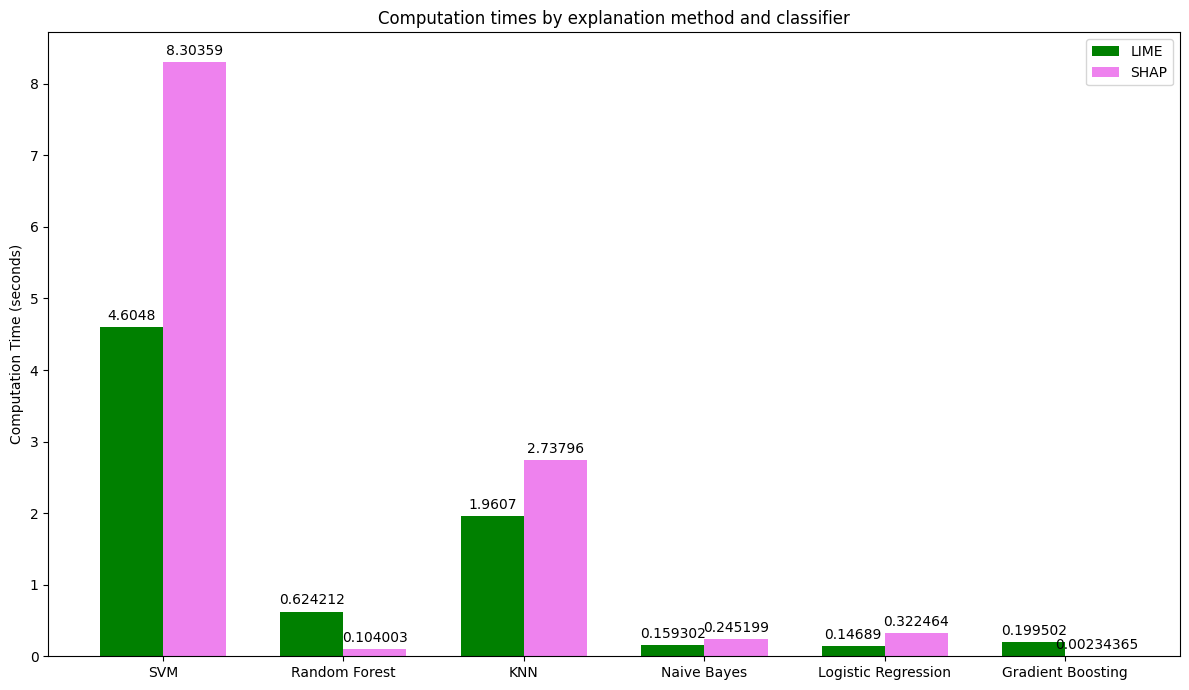

In [152]:
# Data preparation
labels = list(classifiers.keys())
lime_times = times['LIME']
shap_times = times['SHAP']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,7))
rects1 = ax.bar(x - width/2, lime_times, width, label='LIME', color='green')
rects2 = ax.bar(x + width/2, shap_times, width, label='SHAP', color='violet')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Computation Time (seconds)')
ax.set_title('Computation times by explanation method and classifier')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()


In [153]:
complexity_levels = [10, 50, 100, 200, 500, 1000]


In [154]:
import time
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the background data for SHAP
background_data = X_train[np.random.choice(X_train.shape[0], 20, replace=False)]

# Storage for computation times
times = {'LIME': [], 'SHAP': []}

# Initialize LIME explainer
explainer_lime = LimeTabularExplainer(X_train,
                                      feature_names=feature_names,
                                      class_names=['No Churn', 'Churn'],
                                      mode='classification')

for n_estimators in complexity_levels:
    # Train Gradient Boosting classifier
    gb = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
    gb.fit(X_train, y_train)

    # Compute LIME explanations and record time
    start_time = time.time()
    for instance in instances:
        explainer_lime.explain_instance(instance, gb.predict_proba, num_features=len(feature_names))
    end_time = time.time()
    times['LIME'].append(end_time - start_time)

    # Initialize SHAP explainer for Gradient Boosting
    explainer_shap = shap.TreeExplainer(gb, background_data)

    # Compute SHAP explanations and record time
    start_time = time.time()
    for instance in instances:
        explainer_shap.shap_values(instance)
    end_time = time.time()
    times['SHAP'].append(end_time - start_time)


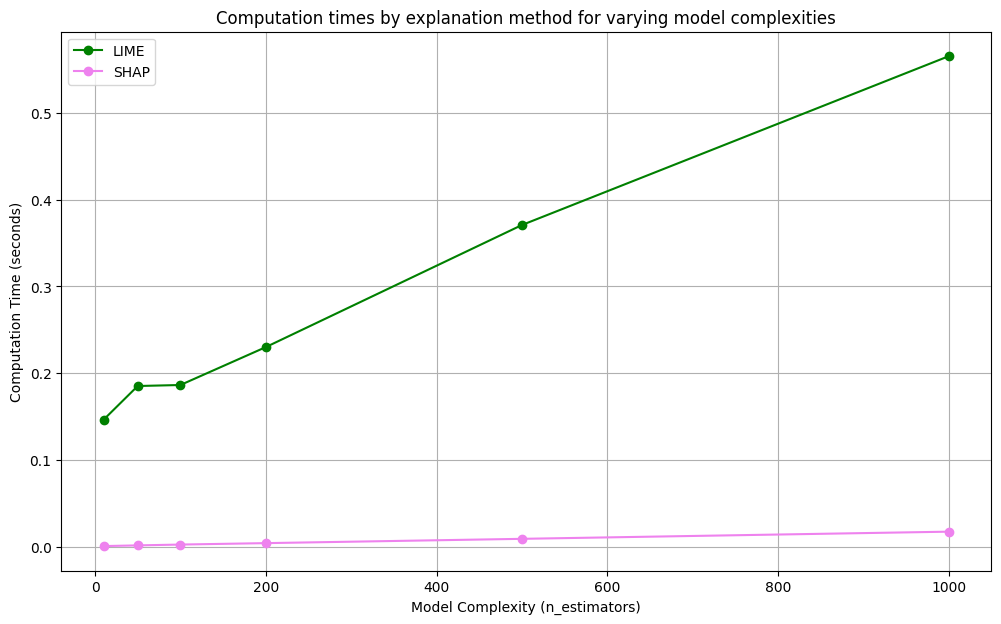

In [155]:
# Data preparation
lime_times = times['LIME']
shap_times = times['SHAP']

plt.figure(figsize=(12,7))
plt.plot(complexity_levels, lime_times, '-o', label='LIME', color='green')
plt.plot(complexity_levels, shap_times, '-o', label='SHAP', color='violet')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylabel('Computation Time (seconds)')
plt.title('Computation times by explanation method for varying model complexities')
plt.legend()
plt.grid(True)
plt.show()


In [156]:
import time
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the background data for SHAP
background_data = X_train[np.random.choice(X_train.shape[0], 20, replace=False)]

# Storage for computation times
times = {'LIME': [], 'Tree SHAP': [], 'Kernel SHAP': []}

# Initialize LIME explainer
explainer_lime = LimeTabularExplainer(X_train,
                                      feature_names=feature_names,
                                      class_names=['No Churn', 'Churn'],
                                      mode='classification')

for n_estimators in complexity_levels:
    # Train Gradient Boosting classifier
    gb = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
    gb.fit(X_train, y_train)

    # Compute LIME explanations and record time
    start_time = time.time()
    for instance in instances:
        explainer_lime.explain_instance(instance, gb.predict_proba, num_features=len(feature_names))
    end_time = time.time()
    times['LIME'].append(end_time - start_time)

    # Initialize Tree SHAP explainer for Gradient Boosting
    explainer_tree_shap = shap.TreeExplainer(gb, background_data)

    # Compute Tree SHAP explanations and record time
    start_time = time.time()
    for instance in instances:
        explainer_tree_shap.shap_values(instance)
    end_time = time.time()
    times['Tree SHAP'].append(end_time - start_time)

    # Initialize Kernel SHAP explainer for Gradient Boosting
    explainer_kernel_shap = shap.KernelExplainer(gb.predict_proba, background_data)

    # Compute Kernel SHAP explanations and record time
    start_time = time.time()
    for instance in instances:
        explainer_kernel_shap.shap_values(instance)
    end_time = time.time()
    times['Kernel SHAP'].append(end_time - start_time)


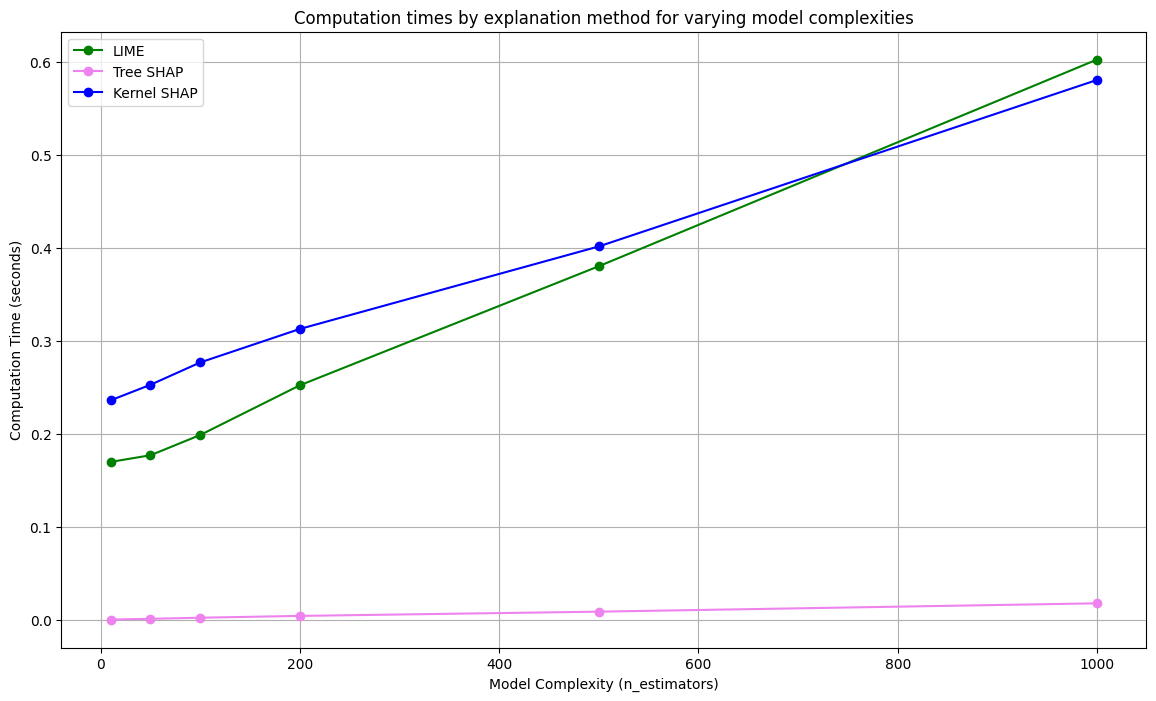

In [157]:
# Data preparation
lime_times = times['LIME']
tree_shap_times = times['Tree SHAP']
kernel_shap_times = times['Kernel SHAP']

plt.figure(figsize=(14,8))
plt.plot(complexity_levels, lime_times, '-o', label='LIME', color='green')
plt.plot(complexity_levels, tree_shap_times, '-o', label='Tree SHAP', color='violet')
plt.plot(complexity_levels, kernel_shap_times, '-o', label='Kernel SHAP', color='blue')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylabel('Computation Time (seconds)')
plt.title('Computation times by explanation method for varying model complexities')
plt.legend()
plt.grid(True)
plt.show()
